__Credit Data Cleaning__

This section details the steps I took to explore and clean the credit data.


In [2]:
#Import necessary packages
import pandas as pd
import numpy as np
import os

In [3]:
# Set display options to avoid line breaks
pd.set_option('display.max_columns', None)  # Display all columns
pd.set_option('display.width', 1000)  # Set the display width to avoid line breaks
pd.set_option('display.float_format', '{:.0f}'.format)#silence scientific displays

In [4]:
# Change the working directory to where the data file is located
os.chdir('C:/Users/moger/Downloads/Loan_Prediction_ML')

# Specify the absolute path to the data file
file_path = 'C:/Users/moger/Downloads/Loan_Prediction_ML/Raw_Data/credit_train.csv'

# Load the raw data
df_train = pd.read_csv(file_path)

# Display the first few rows of the data
display(df_train.head())

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,Fully Paid,445412,Short Term,709,1167493,8 years,Home Mortgage,Home Improvements,5215,17,NaN,6,1,228190,416746,1,0
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,Fully Paid,262328,Short Term,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,33296,21,8,35,0,229976,850784,0,0
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,Fully Paid,99999999,Short Term,741,2231892,8 years,Own Home,Debt Consolidation,29201,15,29,18,1,297996,750090,0,0
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,Fully Paid,347666,Long Term,721,806949,3 years,Own Home,Debt Consolidation,8742,12,NaN,9,0,256329,386958,0,0
4,d4062e70-befa-4995-8643-a0de73938182,81536ad9-5ccf-4eb8-befb-47a4d608658e,Fully Paid,176220,Short Term,NaN,NaN,5 years,Rent,Debt Consolidation,20640,6,NaN,15,0,253460,427174,0,0


In [5]:
#get the shape
print(df_train.shape)#The data has 100,514 records and 19 features
#Get the data type of each variable
print(df_train.dtypes)#the data types are okay

(100514, 19)
Loan ID                          object
Customer ID                      object
Loan Status                      object
Current Loan Amount             float64
Term                             object
Credit Score                    float64
Annual Income                   float64
Years in current job             object
Home Ownership                   object
Purpose                          object
Monthly Debt                    float64
Years of Credit History         float64
Months since last delinquent    float64
Number of Open Accounts         float64
Number of Credit Problems       float64
Current Credit Balance          float64
Maximum Open Credit             float64
Bankruptcies                    float64
Tax Liens                       float64
dtype: object


In [6]:
#Check if teh data has any duplicates
dups=df_train[df_train.duplicated(keep=False)]
print(dups)#Shows some potential duplicates -20,944 records

                                     Loan ID                           Customer ID Loan Status  Current Loan Amount        Term  Credit Score  Annual Income Years in current job Home Ownership             Purpose  Monthly Debt  Years of Credit History  Months since last delinquent  Number of Open Accounts  Number of Credit Problems  Current Credit Balance  Maximum Open Credit  Bankruptcies  Tax Liens
0       14dd8831-6af5-400b-83ec-68e61888a048  981165ec-3274-42f5-a3b4-d104041a9ca9  Fully Paid               445412  Short Term           709        1167493              8 years  Home Mortgage   Home Improvements          5215                       17                           NaN                        6                          1                  228190               416746             1          0
3       77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a  e777faab-98ae-45af-9a86-7ce5b33b1011  Fully Paid               347666   Long Term           721         806949              3 years       Own Home

In [7]:
#Check if the duplicates are exact duplicates with all rows matching
print(dups.head())#The duplicates do not seem like exact matches

#Additionally, there seems to be an error, since in Excel the data shows 100,000 records. There are rows with all nulls.

                                 Loan ID                           Customer ID Loan Status  Current Loan Amount        Term  Credit Score  Annual Income Years in current job Home Ownership             Purpose  Monthly Debt  Years of Credit History  Months since last delinquent  Number of Open Accounts  Number of Credit Problems  Current Credit Balance  Maximum Open Credit  Bankruptcies  Tax Liens
0   14dd8831-6af5-400b-83ec-68e61888a048  981165ec-3274-42f5-a3b4-d104041a9ca9  Fully Paid               445412  Short Term           709        1167493              8 years  Home Mortgage   Home Improvements          5215                       17                           NaN                        6                          1                  228190               416746             1          0
3   77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a  e777faab-98ae-45af-9a86-7ce5b33b1011  Fully Paid               347666   Long Term           721         806949              3 years       Own Home  Debt Conso

In [8]:
#Confirm if the Loan ID is unique
# Check the number of unique values in 'Loan Id' and 'customer id'
unique_loan_ids = df_train['Loan ID'].nunique()
unique_customer_ids = df_train['Customer ID'].nunique()

print(f"Number of unique Loan Ids: {unique_loan_ids}")
print(f"Number of unique Customer Ids: {unique_customer_ids}")

Number of unique Loan Ids: 81999
Number of unique Customer Ids: 81999


In [9]:
#Since there are 81,999 unique loans and customers, could it be that the rest are duplicated?
#Will need to understand the data further.
#Maybe there instances where the same customer took multiple loans, but if so, there should be unique loan ids. 

#Filter two loan ids aidentified above as duplicates and check if they are exact duplicates
see_dups_1=df_train[df_train["Loan ID"]=="14dd8831-6af5-400b-83ec-68e61888a048"]
print(see_dups_1)
#Shows an exact duplicates

                                    Loan ID                           Customer ID Loan Status  Current Loan Amount        Term  Credit Score  Annual Income Years in current job Home Ownership            Purpose  Monthly Debt  Years of Credit History  Months since last delinquent  Number of Open Accounts  Number of Credit Problems  Current Credit Balance  Maximum Open Credit  Bankruptcies  Tax Liens
0      14dd8831-6af5-400b-83ec-68e61888a048  981165ec-3274-42f5-a3b4-d104041a9ca9  Fully Paid               445412  Short Term           709        1167493              8 years  Home Mortgage  Home Improvements          5215                       17                           NaN                        6                          1                  228190               416746             1          0
38854  14dd8831-6af5-400b-83ec-68e61888a048  981165ec-3274-42f5-a3b4-d104041a9ca9  Fully Paid               445412  Short Term           709        1167493              8 years  Home Mortgage  Hom

In [10]:
#Drop exact duplicate records
df_train = df_train.drop_duplicates()

print(f"Number of records after dropping duplicates: {df_train.shape[0]}")#data now has  89,785 records

Number of records after dropping duplicates: 89786


In [11]:
#Check for null values
print(df_train.info())

<class 'pandas.core.frame.DataFrame'>
Index: 89786 entries, 0 to 100000
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Loan ID                       89785 non-null  object 
 1   Customer ID                   89785 non-null  object 
 2   Loan Status                   89785 non-null  object 
 3   Current Loan Amount           89785 non-null  float64
 4   Term                          89785 non-null  object 
 5   Credit Score                  70631 non-null  float64
 6   Annual Income                 70631 non-null  float64
 7   Years in current job          85983 non-null  object 
 8   Home Ownership                89785 non-null  object 
 9   Purpose                       89785 non-null  object 
 10  Monthly Debt                  89785 non-null  float64
 11  Years of Credit History       89785 non-null  float64
 12  Months since last delinquent  41448 non-null  float64
 13  Numbe

In [12]:
#As identified earliear, seems like the csv format when read in here coerces some all null rows.
# Check for blank rows
blank_rows = df_train[df_train.isnull().all(axis=1)]
print(f"Number of blank rows: {len(blank_rows)}")

Number of blank rows: 1


In [13]:
#Drop the blank rows
df_train = df_train.dropna(how='all')
#verify
print(df_train.shape)#Looks good now

(89785, 19)


In [14]:
#Also, the variable such as Months since last deliquent seem to have way too many nulls about half of the dataset
#Others with significant nulls are credit score, Annual income,Years in current job,Maximum open credits
#Start with the credit score. Since this is a standard measure that ranges from 300 to 850. Check for any typos or incorrect entries
# Find values in the credit_score column outside the range of 300 to 850
invalid_credit_scores = df_train[(df_train['Credit Score'] < 300) | (df_train['Credit Score'] > 850)]

print("Invalid credit scores:\n", invalid_credit_scores['Credit Score'])

Invalid credit scores:
 5       7290
43      7120
51      6610
56      7380
65      7370
        ... 
99851   7420
99872   7070
99906   6880
99944   6790
99947   6940
Name: Credit Score, Length: 4551, dtype: float64


In [15]:
# Create a function to correct the credit score by dropping the fourth digit
def correct_credit_score(score):
    if score > 850 or score < 300:
        return int(str(score)[:3])
    return score

# Apply the function to correct the invalid credit scores
df_train['Credit Score'] = df_train['Credit Score'].apply(correct_credit_score)

# Verify if it worked
invalid_credit_scores_after_correction = df_train[(df_train['Credit Score'] < 300) | (df_train['Credit Score'] > 850)]
print("Invalid credit scores after correction:\n", invalid_credit_scores_after_correction['Credit Score'])#Returns an empty variable, hence worked

Invalid credit scores after correction:
 Series([], Name: Credit Score, dtype: float64)


In [16]:
#Next Explore the Current Loan Amount variable to understand the case of "99999999"
check_ridiculous_loan_amount=df_train[['Current Loan Amount','Term','Loan Status','Monthly Debt','Current Credit Balance']]

check_1=check_ridiculous_loan_amount[check_ridiculous_loan_amount['Current Loan Amount']==99999999]
print(check_1.head(10))

    Current Loan Amount        Term Loan Status  Monthly Debt  Current Credit Balance
2              99999999  Short Term  Fully Paid         29201                  297996
10             99999999  Short Term  Fully Paid         11851                  203965
12             99999999  Short Term  Fully Paid         11578                  134083
13             99999999  Short Term  Fully Paid         17560                  225549
26             99999999  Short Term  Fully Paid         13817                  138339
28             99999999  Short Term  Fully Paid         19247                  224390
30             99999999  Short Term  Fully Paid         31040                  229349
36             99999999  Short Term  Fully Paid         17046                  213484
54             99999999   Long Term  Fully Paid         34715                  733324
72             99999999  Short Term  Fully Paid         48708                  348802


In [17]:
#Looks like the debt was only in the case where the loan status is always fully paid
#confirm
check_2=check_1['Loan Status'].unique()

print(check_2)
#That is the case, the loan amount only occurs where the loan is fully paid up
#Explore the summary statistics to ascertain if the loan amount happens to be the maximum
check_3=df_train['Current Loan Amount'].describe()
print(check_3)
#Indeed the loan amount is the maximum

['Fully Paid']
count      89785
mean    13060895
std     33295560
min        10802
25%       180268
50%       313874
75%       532378
max     99999999
Name: Current Loan Amount, dtype: float64


C:\Users\moger\Downloads\conda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


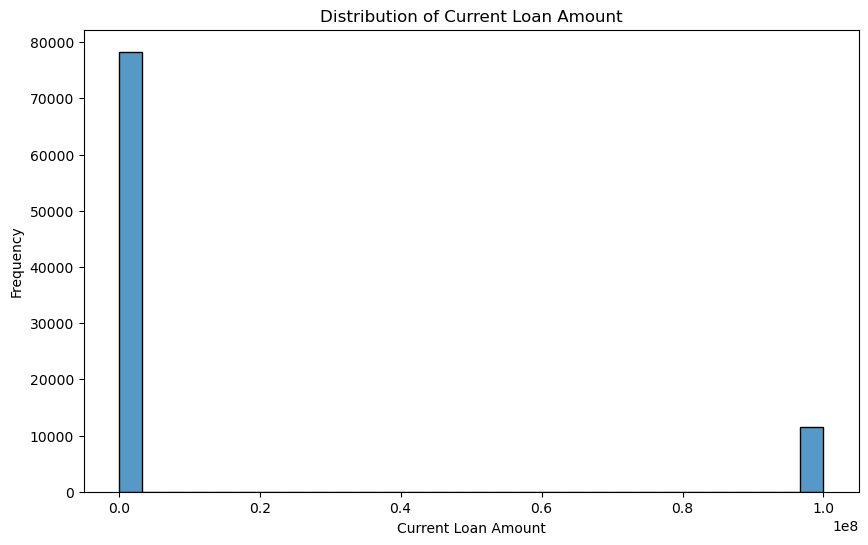

In [18]:
#Create a histogram
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.histplot(df_train['Current Loan Amount'], bins=30, kde=False, edgecolor='black')
plt.title('Distribution of Current Loan Amount')
plt.xlabel('Current Loan Amount')
plt.ylabel('Frequency')

# Show plot
plt.show()

In [19]:
#Looks like the figuire is indeed an outlier
#I suspect it could be a case of missing value and then the record is imputed with teh ridiculous figure
#replace it with NaN 
df_train['Current Loan Amount'].replace(99999999, pd.NA, inplace=True)

In [20]:
#Explore the Years in current job variable
#will need to rename tthe records
years_in_job=df_train['Years in current job'].unique()
print(years_in_job)

['8 years' '10+ years' '3 years' '5 years' '< 1 year' '2 years' '4 years'
 '9 years' '7 years' '1 year' nan '6 years']


In [21]:
#Replace 10+ years with More than 10 years.
df_train['Years in current job'].replace('10+ years', 'More than 10 years', inplace=True)
#Replace < 1 years with Less than 1 year
df_train['Years in current job'].replace('< 1 year', 'Less than 1 year', inplace=True)
#Replace n/a with NA
df_train['Years in current job'] = df_train['Years in current job'].fillna(pd.NA)

In [22]:
gz=df_train['Years in current job'].unique()
print(gz)

['8 years' 'More than 10 years' '3 years' '5 years' 'Less than 1 year'
 '2 years' '4 years' '9 years' '7 years' '1 year' <NA> '6 years']


 __Creating different versions of cleaned data__

In this section I will explore the missing values 

First, I will create the first version of the data that drops all records in all variables with nulls

Second, I will impute nulls with either the mean,mode,or,median, and create the second version of the clean data

Third, I will impute nulls with either the mean,mode,or,median, and create the second version of the clean data


I will test how the different versions perform during model evaluation.

In [24]:
#Create teh first version with all missing values dropped

# Drop rows with any null values
df_train_clean = df_train.dropna()

# Check the shape of the new DataFrame to see how many rows were dropped
print(df_train_clean.shape)

# Save the cleaned data
df_train_clean.to_csv('Clean_Data/credit_train_clean_allnas_dropped.csv', index=False)

(26336, 19)


C:\Users\moger\Downloads\conda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


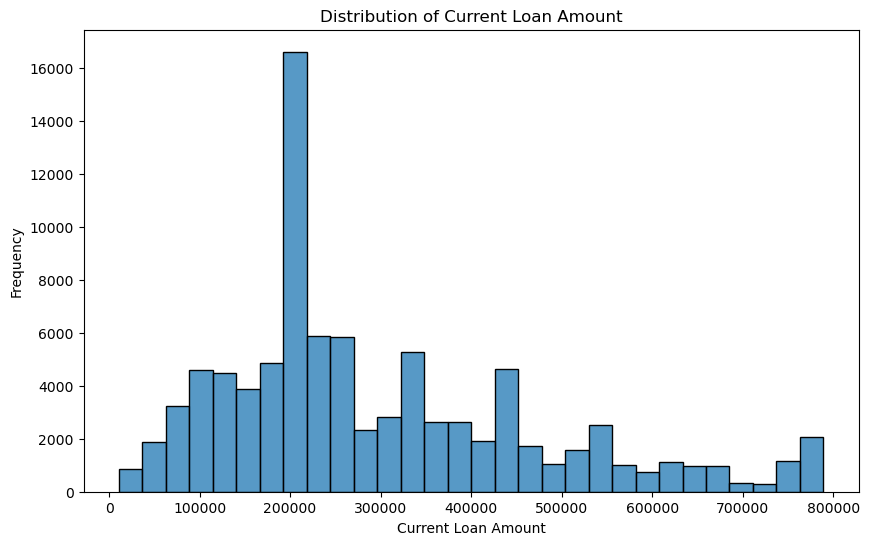

In [25]:
#Next, explore nas in the different variables and fix them
#Start with the Current Loan Amount Variable
#Replace nas with the mode
mode_loan_amount=df_train['Current Loan Amount'].mode()[0]
df_train['Current Loan Amount'].fillna(mode_loan_amount, inplace=True)

#Create a histogram
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.histplot(df_train['Current Loan Amount'], bins=30, kde=False, edgecolor='black')
plt.title('Distribution of Current Loan Amount')
plt.xlabel('Current Loan Amount')
plt.ylabel('Frequency')

# Show plot
plt.show()#Looks pretty normal

count   70631
mean      719
std        28
min       585
25%       706
50%       725
75%       740
max       751
Name: Credit Score, dtype: float64
Mode of credit_score: 747.0


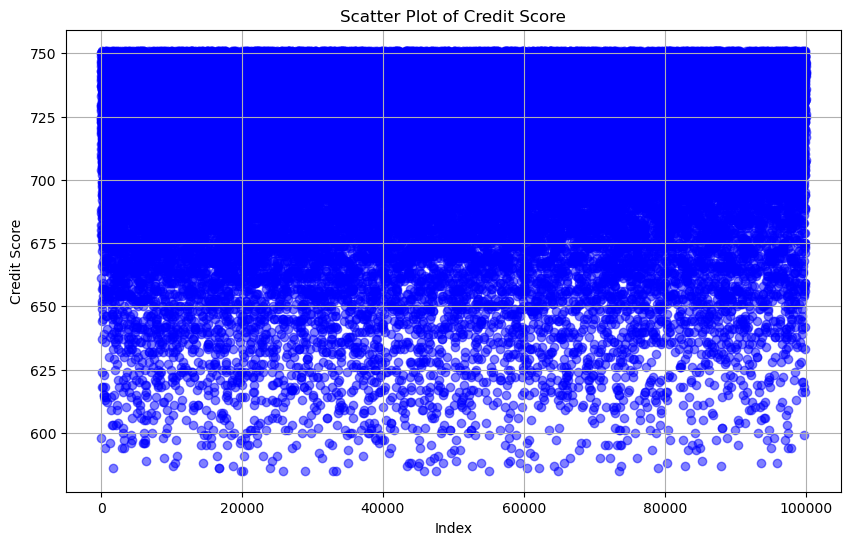

In [26]:
#Next, explore the Credit Score variable
print(df_train['Credit Score'].describe())
# Get the mode of the credit_score 
credit_score_mode = df_train['Credit Score'].mode()
print(f"Mode of credit_score: {credit_score_mode[0]}")

#Plot the credit score scatter plot to check the distribution

plt.figure(figsize=(10, 6))
plt.scatter(df_train.index, df_train['Credit Score'], color='blue', alpha=0.5)
plt.title('Scatter Plot of Credit Score')
plt.xlabel('Index')
plt.ylabel('Credit Score')
plt.grid(True)
plt.show()

In [27]:
#Since the data seems pretty uniform, impute with the mean since much of the data as from the 25th percentile is in the 650-750 range, and the mean is 729
#impute with the mean
mean_credit_score = df_train['Credit Score'].mean()

# Round the mean to the nearest integer
mean_credit_score_rounded = round(mean_credit_score)

# Impute NaNs in credit_score column with the mean
df_train['Credit Score'].fillna(mean_credit_score_rounded, inplace=True)

# Verify if there are any NaNs left
print(df_train['Credit Score'].isnull().sum()) #Returns zero implying all nulls have been replaced by mean credit score.

0


In [28]:
#Next, explore the Years in Current job variable
# Calculate value counts for the 'Years in current job' column
value_counts = df_train['Years in current job'].value_counts()

# Identify the most frequent value
most_frequent_value = value_counts.idxmax()

# Replace NaNs with the most frequent value
df_train['Years in current job'] = df_train['Years in current job'].fillna(most_frequent_value)

In [29]:
#Next, Explore the maximum Open Credit and adress the NAs
print(df_train['Maximum Open Credit'].describe())

count        89783
mean        775657
std        8803517
min              0
25%         277068
50%         472692
75%         791450
max     1539737892
Name: Maximum Open Credit, dtype: float64


In [30]:
#Shows potential outliers, with 75% of customers having less than 791,450
#Replace NAs with the median
median_open_credit = df_train['Maximum Open Credit'].median()
df_train['Maximum Open Credit'].fillna(median_open_credit, inplace=True)

# Check if there are any NaNs are fixed
print(df_train['Maximum Open Credit'].isnull().sum())#perfect, returns zero

0


In [31]:
#Next, explore the bankruptcies variable
#show summary stats
print(df_train['Bankruptcies'].describe())#At least 75% of the customers have no bankrupticies

count   89595
mean        0
std         0
min         0
25%         0
50%         0
75%         0
max         7
Name: Bankruptcies, dtype: float64


In [32]:
#Fix NAs by imputing with the median
median_bankruptcies = df_train['Bankruptcies'].median()
df_train['Bankruptcies'].fillna(median_bankruptcies, inplace=True)

# Check if there are any NaNs are fixed
print(df_train['Bankruptcies'].isnull().sum())#perfect, returns zero

0


In [33]:
#Next, explore the tax liens variables
#summary stats
print(df_train['Tax Liens'].describe())#majority have no tax debt owed

count   89776
mean        0
std         0
min         0
25%         0
50%         0
75%         0
max        15
Name: Tax Liens, dtype: float64


In [34]:
#Replace NAs with mean/median
median_lien = df_train['Tax Liens'].median()
df_train['Tax Liens'].fillna(median_lien, inplace=True)

# Check if there are any NaNs are fixed
print(df_train['Tax Liens'].isnull().sum())#perfect, returns zero

0


In [35]:
#Next, I will explore the Annual income variable missing values
print(df_train['Annual Income'].describe())

count       70631
mean      1375894
std       1104852
min         76627
25%        847932
50%       1168975
75%       1648915
max     165557393
Name: Annual Income, dtype: float64


In [36]:
#I will impute NAs using predictive imputation rather than the mode or mean or median since this approach results in an unbiased distribution

from sklearn.impute import KNNImputer
# Encode categorical variables
df_train_encoded_0 = pd.get_dummies(df_train, columns=['Years in current job', 'Home Ownership', 'Loan Status'], drop_first=False)



In [37]:
# Set display option to show all columns

col =df_train_encoded_0.columns
print(col)

Index(['Loan ID', 'Customer ID', 'Current Loan Amount', 'Term', 'Credit Score', 'Annual Income', 'Purpose', 'Monthly Debt', 'Years of Credit History', 'Months since last delinquent', 'Number of Open Accounts', 'Number of Credit Problems', 'Current Credit Balance', 'Maximum Open Credit', 'Bankruptcies', 'Tax Liens', 'Years in current job_1 year', 'Years in current job_2 years', 'Years in current job_3 years', 'Years in current job_4 years', 'Years in current job_5 years', 'Years in current job_6 years', 'Years in current job_7 years', 'Years in current job_8 years', 'Years in current job_9 years', 'Years in current job_Less than 1 year', 'Years in current job_More than 10 years', 'Home Ownership_HaveMortgage', 'Home Ownership_Home Mortgage', 'Home Ownership_Own Home', 'Home Ownership_Rent', 'Loan Status_Charged Off', 'Loan Status_Fully Paid'], dtype='object')


In [38]:
# Select relevant features for imputation including the encoded columns
features_0 = df_train_encoded_0[['Annual Income','Monthly Debt','Years in current job_1 year', 'Years in current job_2 years', 'Years in current job_3 years', 'Years in current job_4 years', 'Years in current job_5 years', 'Years in current job_6 years', 'Years in current job_7 years', 'Years in current job_8 years', 'Years in current job_9 years', 'Years in current job_Less than 1 year', 'Years in current job_More than 10 years', 'Home Ownership_HaveMortgage', 'Home Ownership_Home Mortgage', 'Home Ownership_Own Home', 'Home Ownership_Rent', 'Loan Status_Charged Off', 'Loan Status_Fully Paid']]  # Adjust the columns based on encoding

# Initialize the imputer
imputer_0 = KNNImputer(n_neighbors=5)

# Fit and transform the data
imputed_features_0 = imputer_0.fit_transform(features_0)

# Replace the 'Annual Income' column with the imputed values
df_train['Annual Income'] = imputed_features_0[:, features_0.columns.get_loc('Annual Income')]

# Verify if there are any NaNs left
print(df_train['Annual Income'].isnull().sum())

0


In [39]:
#Check the Months Since Last deliquent variable
months_deliquent=df_train['Months since last delinquent'].describe()
print(months_deliquent)
print(df_train['Months since last delinquent'].mode())

count   41448
mean       35
std        22
min         0
25%        16
50%        32
75%        51
max       176
Name: Months since last delinquent, dtype: float64
0   13
Name: Months since last delinquent, dtype: float64


C:\Users\moger\Downloads\conda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


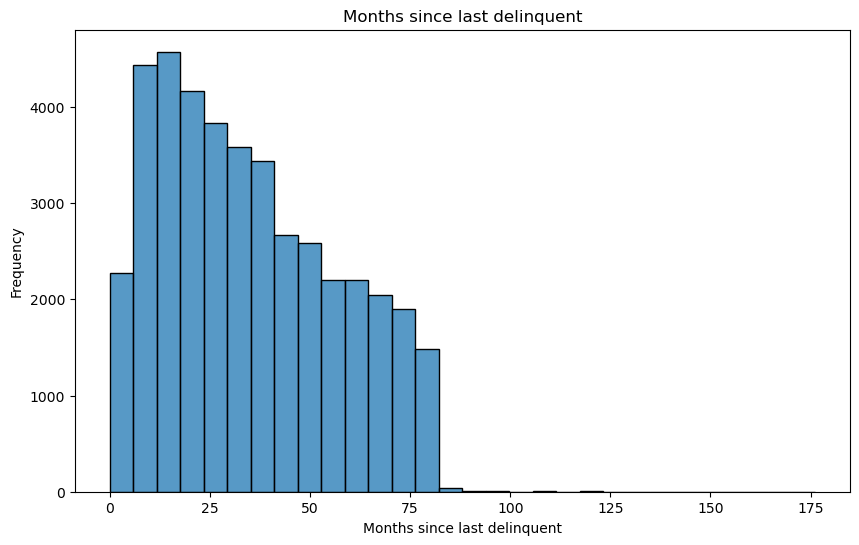

In [40]:
#Explore the current distribution
plt.figure(figsize=(10, 6))
sns.histplot(df_train['Months since last delinquent'], bins=30, kde=False, edgecolor='black')
plt.title('Months since last delinquent')
plt.xlabel('Months since last delinquent')
plt.ylabel('Frequency')

# Show plot
plt.show()
#Plot shows the distribution is right tailed indicating there is a higher likelihood of more and more customers being deliquent for lesser and lesser months and the count
#decreases as the months increase.

In [41]:
#Impute NAs via prediction
# Encode categorical variables
df_train_encoded = pd.get_dummies(df_train, columns=['Loan Status', 'Term'], drop_first=False)

# Select relevant features for imputation including the encoded columns
features = df_train_encoded[['Current Loan Amount', 'Annual Income', 'Monthly Debt', 'Months since last delinquent', 
                             'Loan Status_Charged Off', 'Loan Status_Fully Paid','Term_Long Term','Term_Short Term']]  # Adjust the columns based on encoding

# Initialize the imputer
imputer = KNNImputer(n_neighbors=5)

# Fit and transform the data
imputed_features = imputer.fit_transform(features)

# Replace the 'Months since last delinquent' column with the imputed values
df_train['Months since last delinquent'] = imputed_features[:, features.columns.get_loc('Months since last delinquent')]

# Verify if there are any NaNs left
print(df_train['Months since last delinquent'].isnull().sum())

0


In [42]:
#Export this version of the data as second clean data
df_train.to_csv('Clean_Data/credit_train_nas_imputed.csv',index=False)

In [43]:
#Next, Explore outliers
#check summary statistics again for Maximum Open Credit
print(df_train['Maximum Open Credit'].describe())#mean did not change much, the NAS were not many

count        89785
mean        775650
std        8803420
min              0
25%         277068
50%         472692
75%         791450
max     1539737892
Name: Maximum Open Credit, dtype: float64


C:\Users\moger\Downloads\conda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


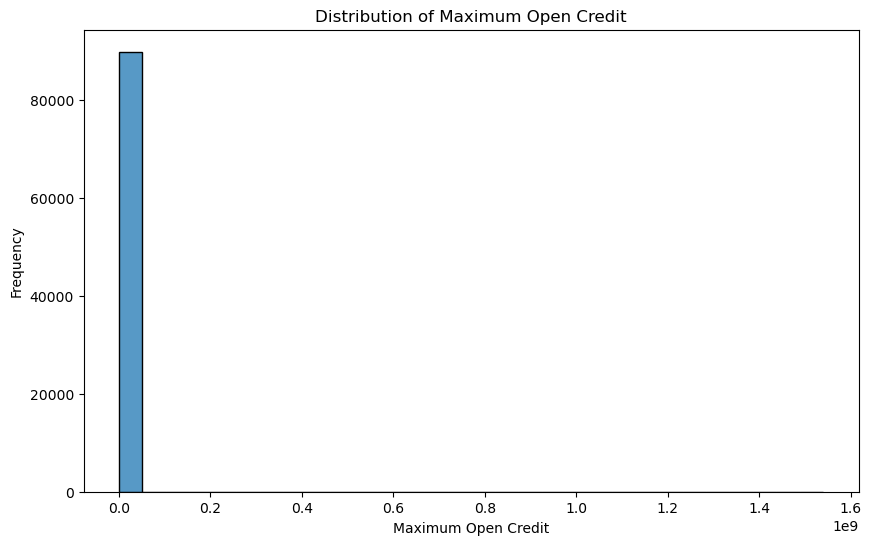

In [44]:
#Create a histogram to exaplore distribution
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.histplot(df_train['Maximum Open Credit'], bins=30, kde=False, edgecolor='black')
plt.title('Distribution of Maximum Open Credit')
plt.xlabel('Maximum Open Credit')
plt.ylabel('Frequency')

# Show plot
plt.show()#Plot does not show well, probably due to significant outliers

In [45]:
#Impute the values above 1.5 times the upper quartile with the median 
# Calculate the upper quartile (Q3) and the interquartile range (IQR)
Q3_moc = df_train['Maximum Open Credit'].quantile(0.75)
IQR_moc = Q3_moc - df_train['Maximum Open Credit'].quantile(0.25)

# Define the threshold for outliers
threshold = Q3_moc + 1.5 * IQR_moc

# Replace values above the threshold with the median
median_moc = df_train['Maximum Open Credit'].median()
df_train.loc[df_train['Maximum Open Credit'] > threshold, 'Maximum Open Credit'] = median_moc

C:\Users\moger\Downloads\conda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


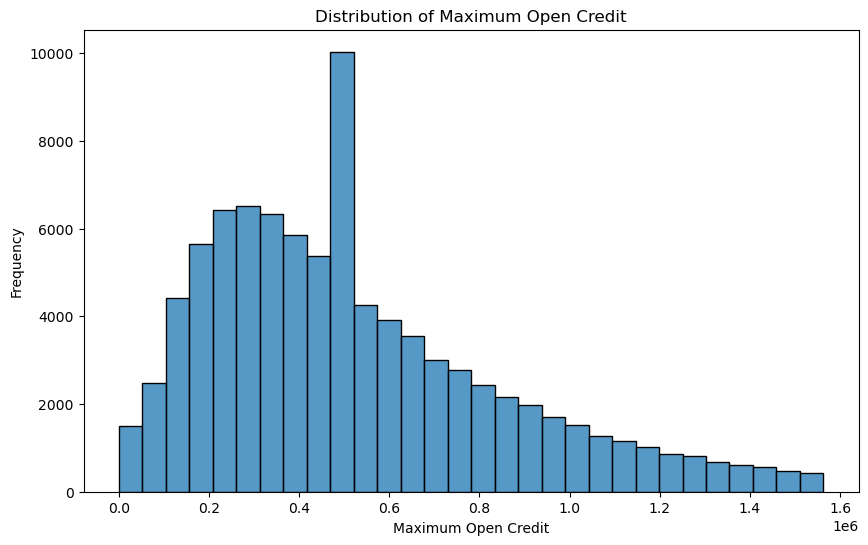

In [46]:
#Create a histogram to exaplore distribution
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.histplot(df_train['Maximum Open Credit'], bins=30, kde=False, edgecolor='black')
plt.title('Distribution of Maximum Open Credit')
plt.xlabel('Maximum Open Credit')
plt.ylabel('Frequency')

# Show plot
plt.show()#plot looks better hence a more balanced distribution

In [49]:
#Export thrid version
df_train.to_csv('Clean_Data/credit_train_final_clean_v1.csv',index=False)